# Setup

## Neuron class

In [2]:
import random

class Neuron:
    weights = []

    # weightcount is the number of inputs
    def __init__(self, weightcount):
        self.weights = [random.random() for _ in range(weightcount)]

    # w[0] is the bias, x[0] = 1
    def param_sum(self, x):
        w = self.weights
        return sum(w[i]*x[i] for i in range(len(x)))
    
    def threshold(self, x):
        if self.param_sum(x) > THRESHOLD:
            return 1
        else:
            return 0


## Data preparation

### Tuplift target

In [3]:
def tuplify(dataLine):
    target = dataLine.pop()
    return (dataLine, target)

### Iris

In [4]:
# because in my dataset, I have changed the target values to 0 and 1
nameIdMap = {0: "Iris-versicolor", 1: "Iris-virginica"}

with open(".\iris\iris.testingdata", "r") as file:
    irisTestingDataTemp = file.read().split("\n")

with open(".\iris\iris.trainingdata", "r") as file:
    irisTrainingDataTemp = file.read().split("\n")

irisTrainingData = [tuplify(list(map(float, line.split(",")))) for line in irisTrainingDataTemp]
irisTestingData = [tuplify(list(map(float, line.split(",")))) for line in irisTestingDataTemp]


print("Data from file:\n", irisTestingData, "\n", irisTrainingData)



Data from file:
 [([5.5, 2.6, 4.4, 1.2], 0.0), ([6.1, 3.0, 4.6, 1.4], 0.0), ([5.8, 2.6, 4.0, 1.2], 0.0), ([5.0, 2.3, 3.3, 1.0], 0.0), ([5.6, 2.7, 4.2, 1.3], 0.0), ([5.7, 3.0, 4.2, 1.2], 0.0), ([5.7, 2.9, 4.2, 1.3], 0.0), ([6.2, 2.9, 4.3, 1.3], 0.0), ([5.1, 2.5, 3.0, 1.1], 0.0), ([5.7, 2.8, 4.1, 1.3], 0.0), ([6.7, 3.1, 5.6, 2.4], 1.0), ([6.9, 3.1, 5.1, 2.3], 1.0), ([5.8, 2.7, 5.1, 1.9], 1.0), ([6.8, 3.2, 5.9, 2.3], 1.0), ([6.7, 3.3, 5.7, 2.5], 1.0), ([6.7, 3.0, 5.2, 2.3], 1.0), ([6.3, 2.5, 5.0, 1.9], 1.0), ([6.5, 3.0, 5.2, 2.0], 1.0), ([6.2, 3.4, 5.4, 2.3], 1.0), ([5.9, 3.0, 5.1, 1.8], 1.0)] 
 [([7.0, 3.2, 4.7, 1.4], 0.0), ([6.4, 3.2, 4.5, 1.5], 0.0), ([6.9, 3.1, 4.9, 1.5], 0.0), ([5.5, 2.3, 4.0, 1.3], 0.0), ([6.5, 2.8, 4.6, 1.5], 0.0), ([5.7, 2.8, 4.5, 1.3], 0.0), ([6.3, 3.3, 4.7, 1.6], 0.0), ([4.9, 2.4, 3.3, 1.0], 0.0), ([6.6, 2.9, 4.6, 1.3], 0.0), ([5.2, 2.7, 3.9, 1.4], 0.0), ([5.0, 2.0, 3.5, 1.0], 0.0), ([5.9, 3.0, 4.2, 1.5], 0.0), ([6.0, 2.2, 4.0, 1.0], 0.0), ([6.1, 2.9, 4.7, 1.4],

### Breast Cancer Wisconsin

In [10]:
import math
# Open the file in read mode ('r')
with open('./breast+cancer+wisconsin+original/breast-cancer-wisconsin.data', 'r') as file:
    # Read the entire file content
    data = file.read()

# get each line of data
lines = data.split('\n')

bcData = []

for line in lines:
    # turn csv to list
    tempSet = line.split(',')
    if '?' not in tempSet:
        #remove id column
        tempSet.pop(0)
        # turn in to a list of floats
        tempSet = list(map(float, tempSet))
        #change target to 0 or 1
        if tempSet[-1] == 2:
            tempSet[-1] = 0
        else:
            tempSet[-1] = 1
        # turn in to tuple
        tempSetTuple = tuplify(tempSet)
        # add to data
        bcData.append(tempSetTuple)

bcTrainingData = bcData[:math.floor(len(bcData)*0.8)]
bcTestingData = bcData[math.floor(len(bcData)*0.8):]

print(len(bcTestingData), len(bcTrainingData))

print("Data from file:\n", bcTestingData, "\n", bcTrainingData)



137 546
Data from file:
 [([5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], 0), ([1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], 0), ([3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], 0), ([4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0], 0), ([5.0, 7.0, 10.0, 10.0, 5.0, 10.0, 10.0, 10.0, 1.0], 1), ([3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], 0), ([4.0, 1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 1.0], 0), ([8.0, 4.0, 4.0, 1.0, 6.0, 10.0, 2.0, 5.0, 2.0], 1), ([10.0, 10.0, 8.0, 10.0, 6.0, 5.0, 10.0, 3.0, 1.0], 1), ([8.0, 10.0, 4.0, 4.0, 8.0, 10.0, 8.0, 2.0, 1.0], 1), ([7.0, 6.0, 10.0, 5.0, 3.0, 10.0, 9.0, 10.0, 2.0], 1), ([3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], 0), ([1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], 0), ([10.0, 9.0, 7.0, 3.0, 4.0, 2.0, 7.0, 7.0, 1.0], 1), ([5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], 0), ([5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], 0), ([1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], 0), ([1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], 0), ([1.0, 1.0, 1.0, 1.0, 

## Task
### Neurono mokymui naudoti stochastinį gradientinį nusileidimą ir ADALINE mokymo taisyklę

Stochastic gradient descent - take training data one by one

In [207]:
import torch

torch.cuda.is_available()


True

## Other functions

### Loss

In [208]:
def loss(neuron, data):

    loss = 0.5 * sum((target - neuron.threshold([1]+features))**2 for features, target in data)

    return loss

### ADALINE training

features - inputs ($X$)

target - the expected result ($t_i$)

error - difference between what the neuron outputs (paramSum) and the target

then each neuron weight gets trained based on LEARNING_RATE

In [226]:
THRESHOLD = 0.5
LEARNING_RATE = 0.001
EPOCHS_IRIS = 50
EPOCHS_CANCER = 50

In [210]:
def trainADALINE(trainingData, neuron):
    # print(trainingData)
    for line in trainingData:
        features, target = line
        #add bias
        features = [1]+features
        error = target - neuron.threshold(features)
        for i in range(len(neuron.weights)):
            neuron.weights[i] += LEARNING_RATE * error * features[i]
    return neuron

### Calculate metrics

In [215]:
def calculateMetrics(neuron, trainingData, testingData):
    allMetrics = {'trainingData':{'loss':0, 'tp': 0, 'tn': 0, 'fp':0, 'fn': 0}, 
                  'testingData' :{'loss':0, 'tp': 0, 'tn': 0, 'fp':0, 'fn': 0}}
    
    for metricSet, data in zip(allMetrics.keys(), [trainingData, testingData]):
    # for metricSet, data in zip(['trainingData'], [trainingData]):
        allMetrics[metricSet]['loss'] = loss(neuron, data)
        for features, target in data:
            # calculate confusion matrix
            pred = neuron.threshold([1]+features)
            if pred == 1:
                if target == 1:
                    allMetrics[metricSet]['tp'] += 1
                else:
                    allMetrics[metricSet]['fp'] += 1
            else:
                if target == 1:
                    allMetrics[metricSet]['fn'] += 1
                else:
                    allMetrics[metricSet]['tn'] += 1
        #calculate precision, recall, accuracy
        allMetrics[metricSet]['precision'] = allMetrics[metricSet]['tp']/(allMetrics[metricSet]['tp']+allMetrics[metricSet]['fp'])
        allMetrics[metricSet]['recall'] = allMetrics[metricSet]['tp']/(allMetrics[metricSet]['tp']+allMetrics[metricSet]['fn'])
        allMetrics[metricSet]['accuracy'] = (allMetrics[metricSet]['tp']+allMetrics[metricSet]['tn'])/(allMetrics[metricSet]['tp']+allMetrics[metricSet]['tn']+allMetrics[metricSet]['fp']+allMetrics[metricSet]['fn'])
        allMetrics[metricSet]['f1'] = 2*(allMetrics[metricSet]['precision']*allMetrics[metricSet]['recall'])/(allMetrics[metricSet]['precision']+allMetrics[metricSet]['recall'])
        pass
    return allMetrics


### Plot

In [221]:
import matplotlib.pyplot as plt

def plotLossAndAccuracy(allMetrics, threshold, step, mainPlot, compare = False):
    if mainPlot == 'training':
        losses= [metrics['trainingData']['loss'] for metrics in allMetrics]
        accuracies = [metrics['trainingData']['accuracy'] for metrics in allMetrics]
        precisions = [metrics['trainingData']['precision'] for metrics in allMetrics]
        recalls = [metrics['trainingData']['recall'] for metrics in allMetrics]
        if compare:
            lossesComp = [metrics['testingData']['loss'] for metrics in allMetrics]
            accuraciesComp = [metrics['testingData']['accuracy'] for metrics in allMetrics]
            precisionsComp = [metrics['testingData']['precision'] for metrics in allMetrics]
            recallsComp = [metrics['testingData']['recall'] for metrics in allMetrics]

    elif mainPlot == 'testing' or compare:
        losses = [metrics['testingData']['loss'] for metrics in allMetrics]
        accuracies = [metrics['testingData']['accuracy'] for metrics in allMetrics]
        precisions = [metrics['testingData']['precision'] for metrics in allMetrics]
        recalls = [metrics['testingData']['recall'] for metrics in allMetrics]
        if compare:
            lossesComp = [metrics['trainingData']['loss'] for metrics in allMetrics]
            accuraciesComp = [metrics['trainingData']['accuracy'] for metrics in allMetrics]
            precisionsComp = [metrics['trainingData']['precision'] for metrics in allMetrics]
            recallsComp = [metrics['trainingData']['recall'] for metrics in allMetrics]
            


    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    line1, = ax1.plot(losses, color=color, label='Loss - ' + mainPlot)
    if compare:
        line3, = ax1.plot(lossesComp, color='tab:orange', label='Loss - ' + ('training' if mainPlot == 'testing' else 'testing'))
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim([0, max([max(losses), max(lossesComp if compare else losses)])])  # Set limits for y-axis on the left

    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color) 
    line2, = ax2.plot(accuracies, color=color, label='Accuracy - ' + mainPlot)
    if compare:
        line4, = ax2.plot(accuraciesComp, color='tab:cyan', label='Accuracy - ' + ('training' if mainPlot == 'testing' else 'testing'))
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([0, 1])  # Set limits for y-axis on the right

    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    if compare:
        lines += [line3, line4]
        labels += [l.get_label() for l in [line3, line4]]

    fig.legend(lines, labels, loc='mi right')

    fig.tight_layout()
    plt.title('Model Loss and Accuracy over Epochs')
    plt.show()

# Start section

ToggleButtons(description='Lern rate = 0.001, \nEpoch count = 50\n Choose activation function:', options=('Can…

Button(description='Run', style=ButtonStyle())

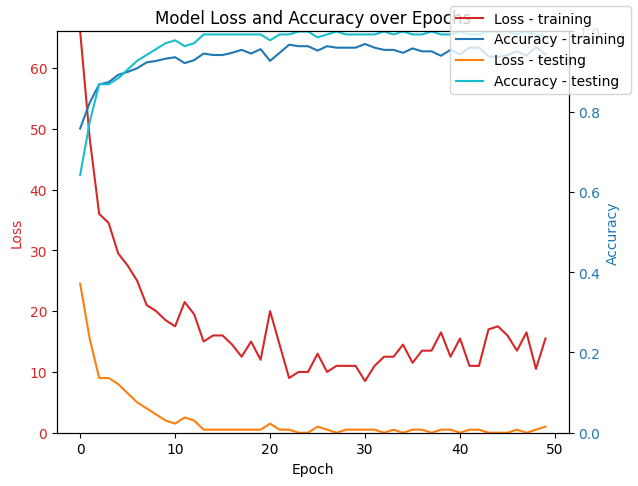

Metrics for the last epoch :

Training data:
loss: 15.500
tp: 181.000
tn: 334.000
fp: 8.000
fn: 23.000
precision: 0.958
recall: 0.887
accuracy: 0.943
f1: 0.921


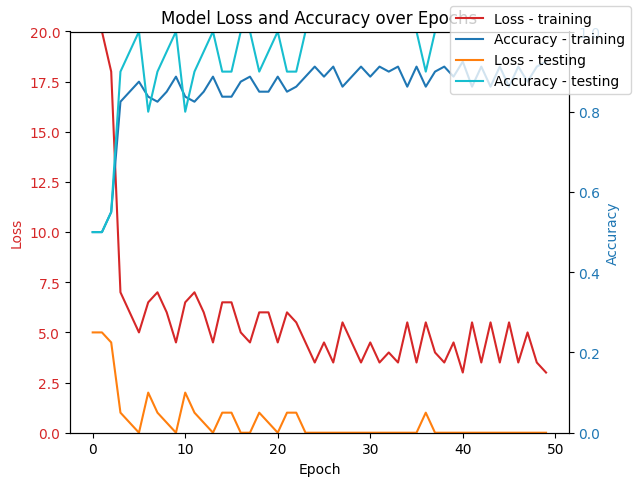

Metrics for the last epoch :

Training data:
loss: 3.000
tp: 39.000
tn: 35.000
fp: 5.000
fn: 1.000
precision: 0.886
recall: 0.975
accuracy: 0.925
f1: 0.929


In [227]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from pprint import pprint

# Create a dictionary that maps neurons and their respective data to a tuple
# which will then be used in a generic training and testing function
# iris has 4 inputs, cancer has 9, because the last of 5 and 10 is the target


neurons = { "Cancer": (Neuron(10), bcTrainingData, bcTestingData, EPOCHS_CANCER), "Iris": (Neuron(5), irisTrainingData, irisTestingData, EPOCHS_IRIS)}


# Create a ToggleButtons widget
toggle = widgets.ToggleButtons(
    # Use function names as options
    options=neurons.keys(),  
    description=f'Lern rate = {LEARNING_RATE}, \nEpoch count = {EPOCHS}\n Choose activation function:',
)
# Display the widget
display(toggle)

# Create a button that will run the selected function when clicked
button = widgets.Button(description="Run")

def onRunClicked(b):
    neuron, trainingData, testingData, epochs = neurons[toggle.value]
    allMetrics = []
    losses = []
    for i in range(epochs):
        neuron = trainADALINE(trainingData, neuron)
        losses.append(loss(neuron, testingData))
        metrics = calculateMetrics(neuron, trainingData, testingData)
        allMetrics.append(metrics)

    def niceDataPrint(dataSetToPrint):
        print(f"Metrics for the last epoch :")
        allDataSets = {'Training': 'trainingData', 'Testing': 'testingData'}
        dataSet = allDataSets[dataSetToPrint]
        print(f"\n{dataSetToPrint} data:")
        for key, value in allMetrics[-1][dataSet].items():
            print(f"{key}: {value:.3f}")
    


    # plot_loss_and_accuracy(losses_testing, accuracies_testing)
    plotLossAndAccuracy(allMetrics, THRESHOLD, LEARNING_RATE, 'training', compare = True)
    niceDataPrint('Training')
    
    # plotLossAndAccuracy(allMetrics, THRESHOLD, LEARNING_RATE, 'testing', compare = True)
    # niceDataPrint('Testing')



# Register the callback function with the button
button.on_click(onRunClicked)
# Run the function to display the output
display(button)
# debugging only
button.click()
